In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

import json
file = open('data.json', 'r', encoding='utf-8')
data = json.load(file)

students_data = data['students']

rows = []
for student_id, info in students_data.items():
    row = info['scores']
    row['studentGrade'] = info['studentGrade']
    row['totalScore'] = info['totalScore']
    row['id'] = student_id
    rows.append(row)

df = pd.DataFrame(rows)

df['grade_num'] = df['studentGrade'].str.extract(r'(\d)').astype(int)

features = ['불안 및 우울 문제', '심리외상 문제', '외현화 문제', '자살 및 위기 문제', '학교생활적응 문제']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = df.groupby('cluster')[features + ['totalScore']].mean()
print("요약:")
print(cluster_summary)

요약:
         불안 및 우울 문제    심리외상 문제     외현화 문제  자살 및 위기 문제  학교생활적응 문제  totalScore
cluster                                                                     
0            11.375   1.708333   2.333333    1.541667      4.125   21.083333
1            18.000  14.500000  15.000000   16.000000     13.000   76.500000
2             3.640   0.400000   0.600000    0.240000      2.440    7.320000
3            15.375   5.000000   1.500000    2.500000      9.375   33.750000


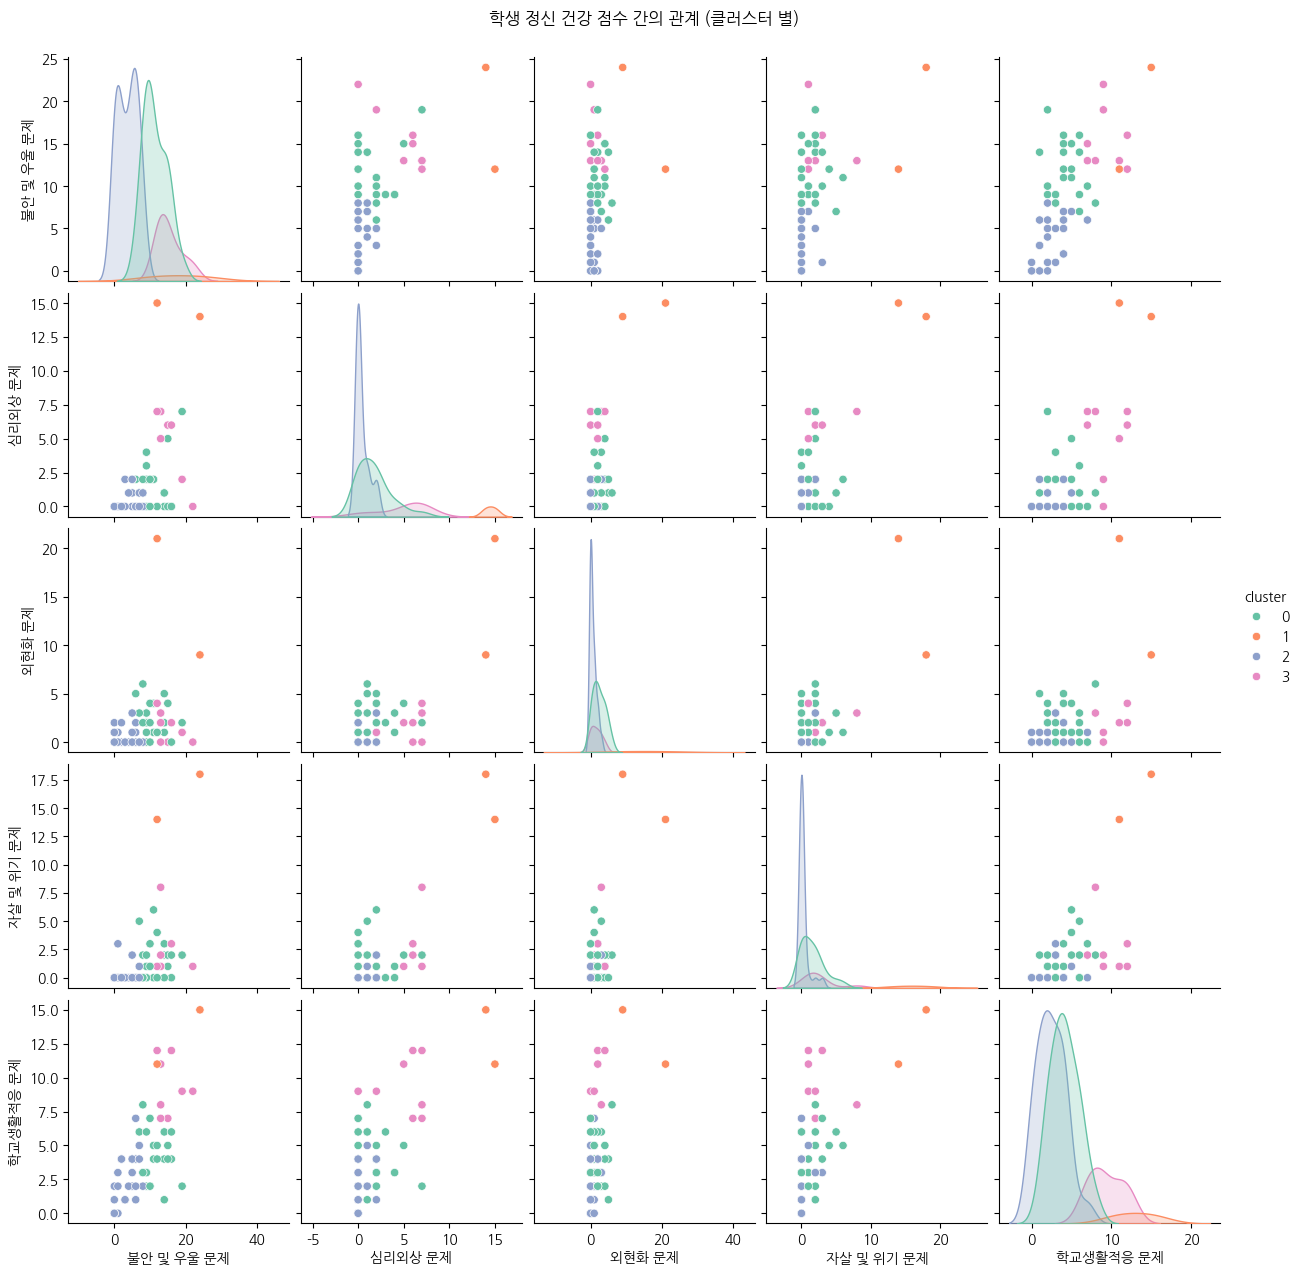

In [10]:
sns.pairplot(df, vars=features, hue='cluster', palette='Set2', height=2.5)
plt.suptitle("학생 정신 건강 점수 간의 관계 (클러스터 별)", y=1.02)
plt.show()

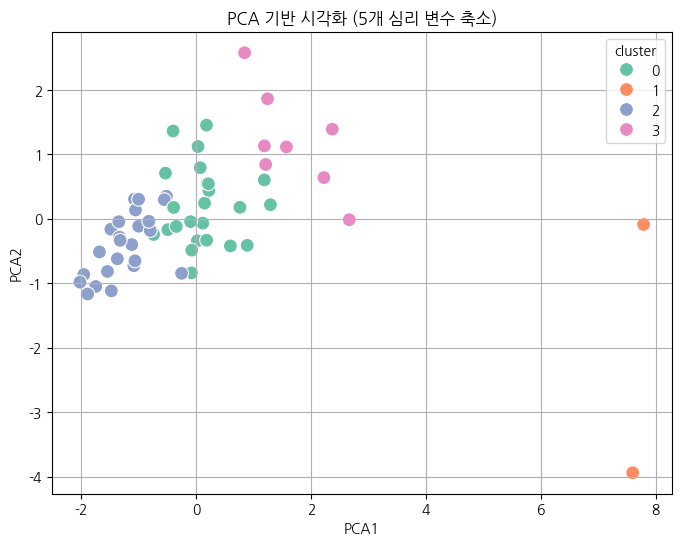

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2',
                hue='cluster', palette='Set2', s=100)
plt.title("PCA 기반 시각화 (5개 심리 변수 축소)")
plt.grid(True)
plt.show()